In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("adult.csv")

# Clean the data

In [3]:
#Dropping education as educational num cover it
df.drop(["education"], axis = 1,  inplace=True)

#Converting the last column to 0s and 1s
df['income'].replace(['>50K', '<=50K'], [1, 0], inplace=True)

# Replacing ? with the most frequent value in each column
df['age'].replace( "?", df['age'].mode()[0], inplace=True)
df['workclass'].replace("?", df['workclass'].mode()[0], inplace=True)
df['fnlwgt'].replace("?", df['fnlwgt'].mode()[0], inplace=True)
df['educational-num'].replace("?",
                              df['educational-num'].mode()[0], inplace=True)
df['occupation'].replace("?", df['occupation'].mode()[0], inplace=True)
df['race'].replace("?", df['race'].mode()[0], inplace=True)
df['gender'].replace("?", df['gender'].mode()[0], inplace=True)
df['capital-gain'].replace("?", df['capital-gain'].mode()[0], inplace=True)
df['capital-loss'].replace("?", df['capital-loss'].mode()[0], inplace=True)
df['hours-per-week'].replace("?", df['hours-per-week'].mode()[0], inplace=True)
df['native-country'].replace("?", df['native-country'].mode()[0], inplace=True)


#Converting categorical variables to numberic values
df['workclass'].replace(df.workclass.unique(), [
                        i for i in range(len(df['workclass'].unique()))], inplace=True)
df['marital-status'].replace(df['marital-status'].unique(), [
    i for i in range(len((df['marital-status'].unique())))], inplace=True)
df['relationship'].replace(df['relationship'].unique(), [
    i for i in range(len(df['relationship'].unique()))], inplace=True)
df['gender'].replace(df['gender'].unique(), [
    i for i in range(len(df['gender'].unique()))], inplace=True)
df['native-country'].replace(df['native-country'].unique(), [
    i for i in range(len(df['native-country'].unique()))], inplace=True)
df['occupation'].replace(df['occupation'].unique(), [
    i for i in range(len(df['occupation'].unique()))], inplace=True)
df['race'].replace(df['race'].unique(), [
    i for i in range(len(df['race'].unique()))], inplace=True)

df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,10,1,0,1,0,0,7688,0,40,0,1
4,18,0,103497,10,0,3,0,1,1,0,0,30,0,0


# Splitting data

In [4]:
# Split the data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Finding best K

In [5]:
# k_values = [i for i in range (1,5+1)]
# scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, y, cv=5)
#     scores.append(np.mean(score))

In [14]:
# Precalculated
k_values = [i for i in range (1,30+1)]
scores = [0.8003153392087775, 0.8189058110493261, 0.8227959852947058, 0.8295729089720286, 0.8301052574084615, 0.8334220744907611, 0.8343434483162193, 0.8368002810038841, 0.8371074251742693, 0.8380492362936829, 0.8381925761084323, 0.8390115371049959, 0.83907295378275, 0.8395234147127892, 0.8390729852215163, 0.8396257604723159, 0.8403218566746051, 0.8407108841595482, 0.8405266613732169, 0.8402809380724212, 0.8397281041359248, 0.8400556960798543, 0.8403628192910617, 0.8410179968911672, 0.84054710076309, 0.8416322118748161, 0.8401580313597921, 0.8407927402271757, 0.8403013585990349, 0.8407108673922064]

scores till 1 to 30: [0.8003153392087775, 0.8189058110493261, 0.8227959852947058, 0.8295729089720286, 0.8301052574084615, 0.8334220744907611, 0.8343434483162193, 0.8368002810038841, 0.8371074251742693, 0.8380492362936829, 0.8381925761084323, 0.8390115371049959, 0.83907295378275, 0.8395234147127892, 0.8390729852215163, 0.8396257604723159, 0.8403218566746051, 0.8407108841595482, 0.8405266613732169, 0.8402809380724212, 0.8397281041359248, 0.8400556960798543, 0.8403628192910617, 0.8410179968911672, 0.84054710076309, 0.8416322118748161, 0.8401580313597921, 0.8407927402271757, 0.8403013585990349, 0.8407108673922064]


Text(0, 0.5, 'Accuracy Score')

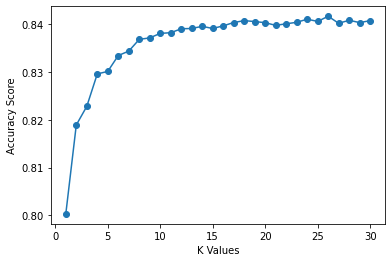

In [22]:
plt.plot(k_values, scores, '-o')
# plt.plot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Using the best K

The best afaik is K=26

In [23]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

In [25]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = (2 * precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8376497082608251
Precision: 0.7157034442498541
Recall: 0.5273118279569893
F1: 0.6072313026250619
